In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
dataframe=pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
def handlerate(rate):
    value=str(rate).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
dataframe.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


Text(0.5, 1.0, 'Classification of Restaurant')

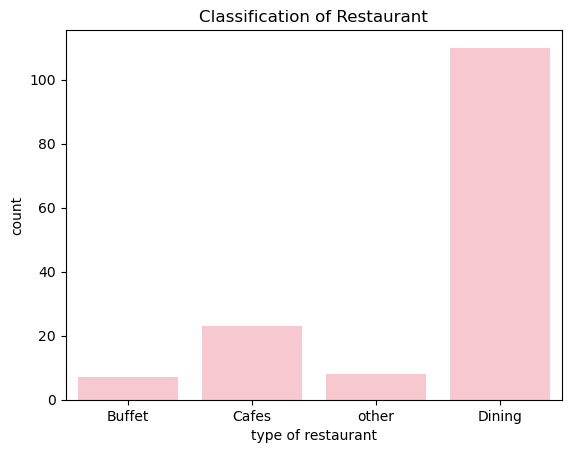

In [11]:
sns.countplot(x=dataframe['listed_in(type)'],color="pink")
plt.xlabel("type of restaurant")
plt.title("Classification of Restaurant")

Text(0, 0.5, 'votes')

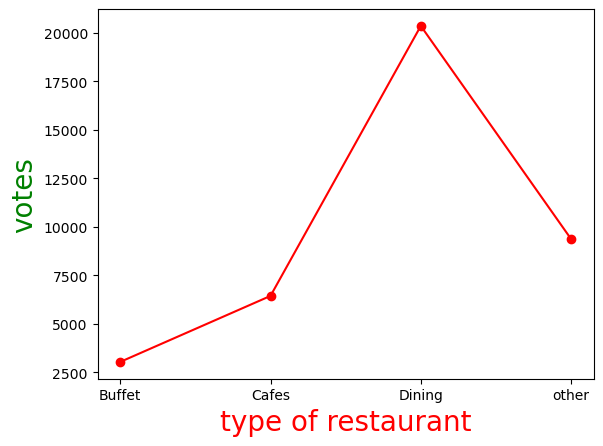

In [19]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='red',marker='o')
plt.xlabel("type of restaurant",c='red',size=20)
plt.ylabel("votes",c='green',size=20)

In [22]:
max_votes=dataframe['votes'].max()
restaurant_with_max_votes=dataframe.loc[dataframe['votes']==max_votes, 'name']
print("restaurants with max votes : ")
print(restaurant_with_max_votes)

restaurants with max votes : 
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

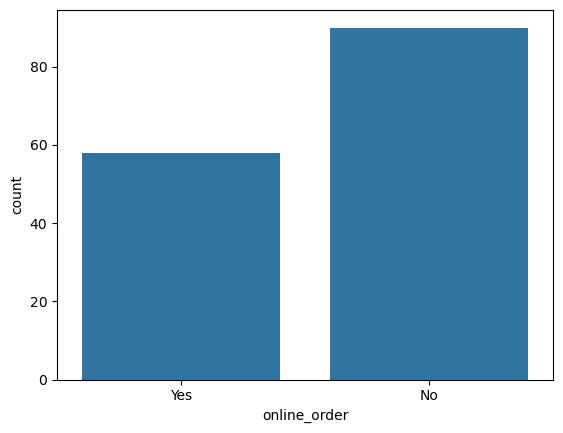

In [26]:
sns.countplot(x=dataframe['online_order'])

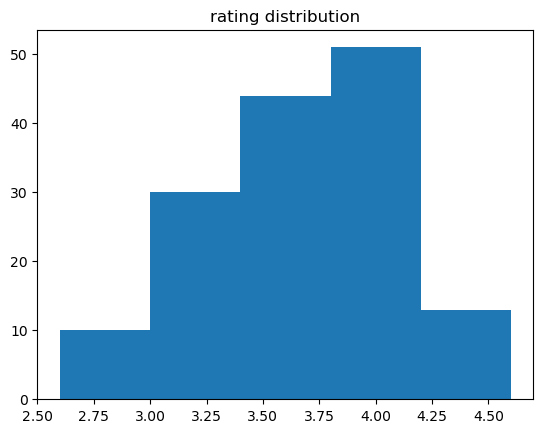

In [28]:
plt.hist(dataframe['rate'],bins=5)
plt.title("rating distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

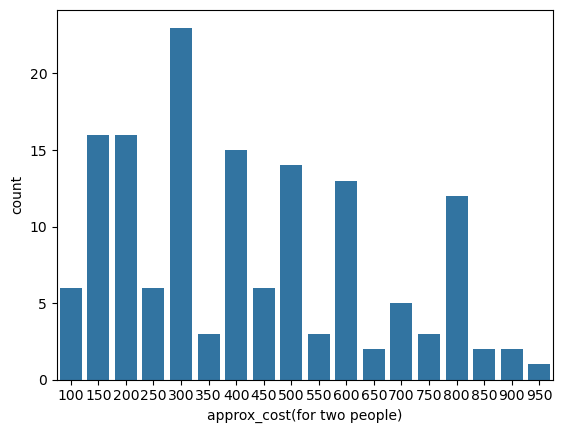

In [30]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

"plt.figure(figsize = (6,6))\nsns.boxplot(x = 'online_order', y = 'rate', data = dataframe)"

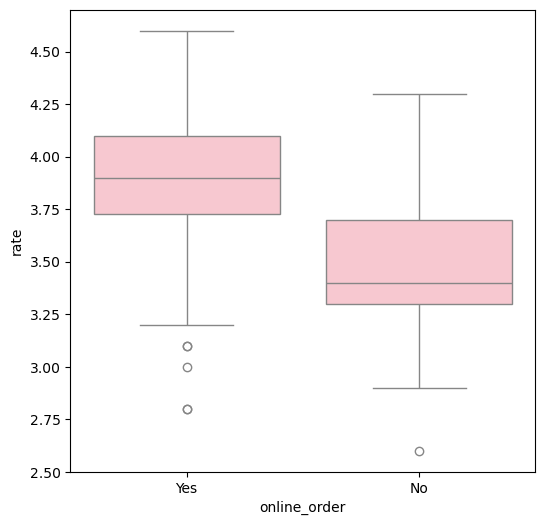

In [35]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe,color="pink")

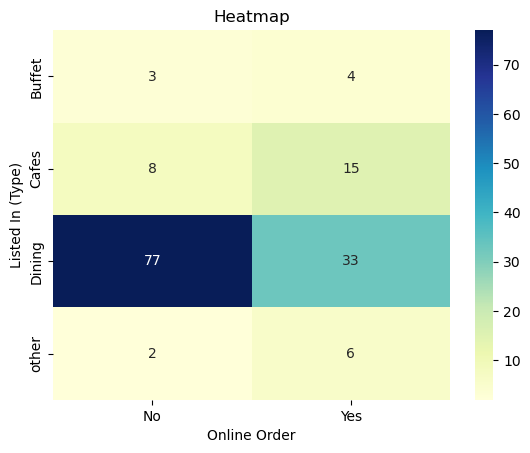

In [36]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()